- https://www.youtube.com/watch?v=H3t4ndSl7nA

# [What are Tensors?](https://learn.microsoft.com/en-us/training/modules/intro-machine-learning-pytorch/2-tensors?ns-enrollment-type=learningpath&ns-enrollment-id=learn.pytorch.pytorch-fundamentals)

## Tensors

Tensors are a specialized data structure that are very similar to arrays and matrices.
In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

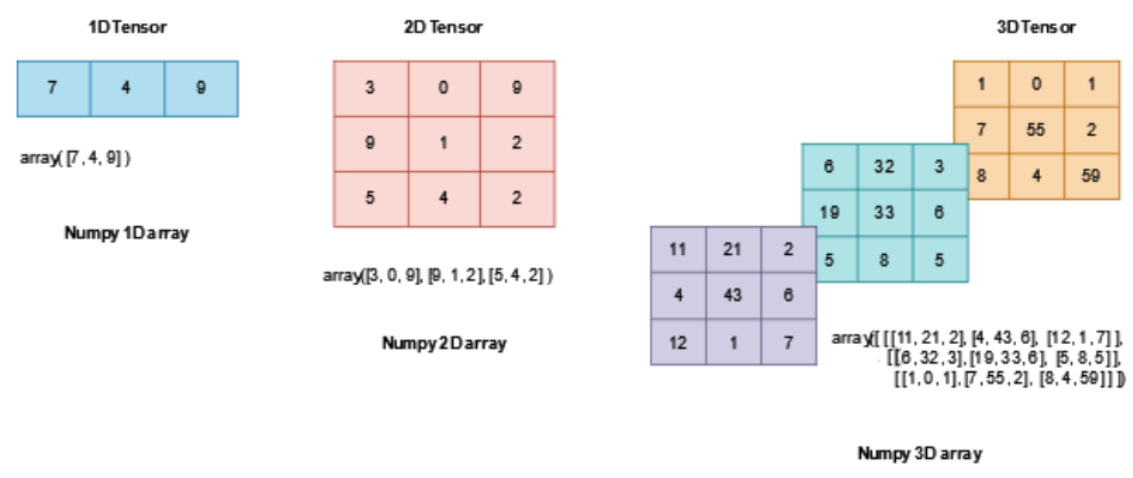

# 1.Tensor 생성

In [1]:
import numpy as np
import torch

## Directly from data

In [2]:
data = [
    [1, 2], [3, 4], [5, 6]
]

data

[[1, 2], [3, 4], [5, 6]]

In [3]:
type(data)

list

In [4]:
data = [
    [1, 2], [3, 4], [5, 6]
]

data_tensor = torch.tensor(data)
data_tensor

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [5]:
data_tensor.shape

torch.Size([3, 2])

In [6]:
type(data_tensor)

torch.Tensor

## From a Numpy array

In [7]:
arr = np.array(data)
arr

array([[1, 2],
       [3, 4],
       [5, 6]])

In [8]:
type(arr)

numpy.ndarray

In [9]:
arr.shape

(3, 2)

In [10]:
arr = np.array(data)
arr_tensor = torch.from_numpy(arr)

print(f'Numpy arr value: \n {arr} \n')
print(f'Tensor arr_tensor value: \n {arr_tensor}')

Numpy arr value: 
 [[1 2]
 [3 4]
 [5 6]] 

Tensor arr_tensor value: 
 tensor([[1, 2],
        [3, 4],
        [5, 6]])


In [11]:
np.multiply(arr, 2, out=arr)

print(f'Numpy arr after * 2 operation: \n {arr} \n')
print(f'Tensor arr_tensor value after modifying numpy array: \n {arr_tensor}')

Numpy arr after * 2 operation: 
 [[ 2  4]
 [ 6  8]
 [10 12]] 

Tensor arr_tensor value after modifying numpy array: 
 tensor([[ 2,  4],
        [ 6,  8],
        [10, 12]])


## From another tensor

In [12]:
x_ones = torch.ones_like(data_tensor) # retains the proerties of arr_tensor
x_ones

tensor([[1, 1],
        [1, 1],
        [1, 1]])

In [13]:
x_rand = torch.rand_like(data_tensor, dtype=torch.float) # overrides the datatype of arr_tensor
x_rand

tensor([[0.0104, 0.9519],
        [0.1145, 0.3045],
        [0.9271, 0.0974]])

## With random or constant values

In [53]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
rnad_normal_tensor = torch.randn(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)
empty_tensor = torch.empty(shape)

print(f"Random Tensor: \n {rand_tensor} \n") # 0 ~ 1 사이의 숫자를 랜덤으로 생성
print(f"Random Normal Distribution Tensor: \n {rnad_normal_tensor} \n") # 0 ~ 1 사이의 숫자를 가우시안 정규분포를 이용해 생성
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")
print(f"Real Random Tensor: \n {empty_tensor}") # 특정한 값으로 초기화를 하지 않는 행렬

Random Tensor: 
 tensor([[0.3408, 0.9253, 0.3845],
        [0.5042, 0.8637, 0.1841]]) 

Random Normal Distribution Tensor: 
 tensor([[-0.0970, -0.9286, -0.7204],
        [ 0.9448, -0.9648,  0.1622]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])
Real Random Tensor: 
 tensor([[-4.5040e-20,  3.1235e-41, -3.4354e-20],
        [ 3.1235e-41,  1.5695e-43,  0.0000e+00]])


# 2.Tensor 속성

In [15]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## device

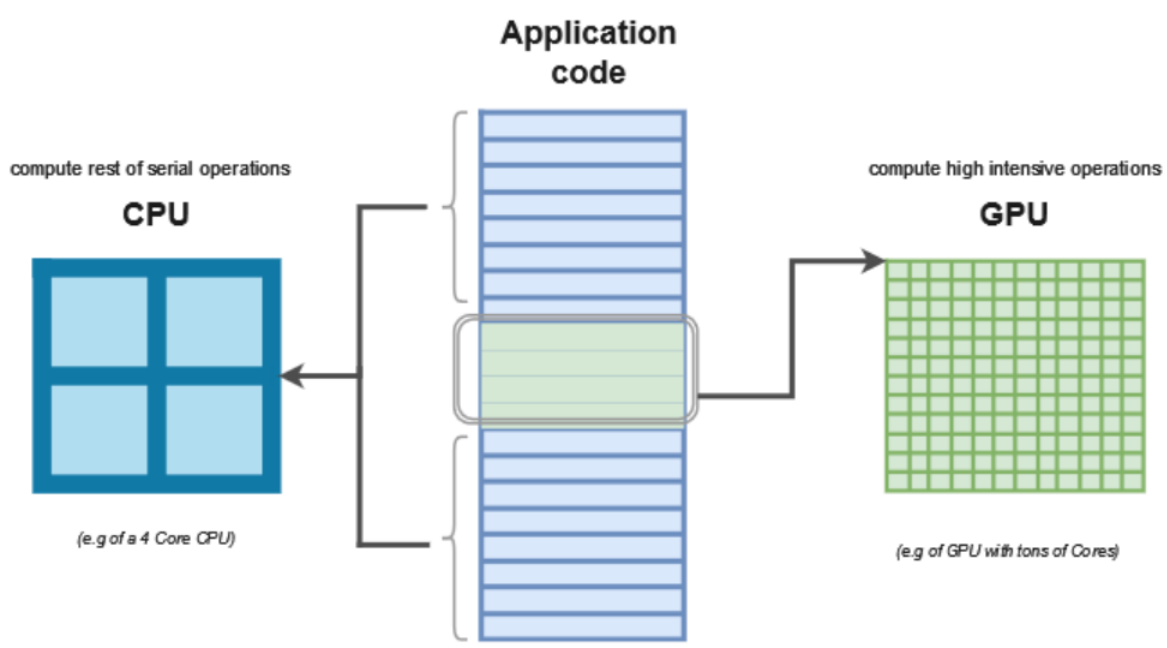

In [16]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to('cuda')

tensor.device

device(type='cpu')

In [17]:
tensor = tensor.to('cpu')
tensor.device

device(type='cpu')

# 3.Tensor 연산

## Indexing and Slicing

In [18]:
data = [
    [1, 2, 3], [4, 5, 6], [7, 8, 9]
]
tensor = torch.tensor(data, dtype=torch.float)

print(tensor)
print('-'*50)

print('First row: ',tensor[0])
print('Last row: ',tensor[-1])
print('First column: ', tensor[:, 0])
print('Last column1:', tensor[:, -1])
print('Last column2:', tensor[..., -1])

print('-'*50)
tensor[:,1] = 0
tensor[1] = 0
print(tensor)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])
--------------------------------------------------
First row:  tensor([1., 2., 3.])
Last row:  tensor([7., 8., 9.])
First column:  tensor([1., 4., 7.])
Last column1: tensor([3., 6., 9.])
Last column2: tensor([3., 6., 9.])
--------------------------------------------------
tensor([[1., 0., 3.],
        [0., 0., 0.],
        [7., 0., 9.]])


## Joining tensors
- torch.cat()은 주어진 차원을 기준으로 주어진 텐서들을 붙입(concatenate)니다.
- torch.stack()은 새로운 차원으로 주어진 텐서들을 붙입니다.

In [22]:
t1 = torch.tensor([[1, 2],
                   [3, 4]])
t2 = torch.tensor([[5, 6],
                   [7, 8]])

t1.shape, t2.shape

(torch.Size([2, 2]), torch.Size([2, 2]))

### torch.cat()

In [23]:
torch.cat((t1, t2), dim=0)

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])

In [24]:
torch.cat((t1, t2), dim=1)

tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])

### torch.stack()

In [25]:
torch.stack((t1, t2), dim=0)

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])

In [26]:
torch.stack((t1, t2), dim=1)

tensor([[[1, 2],
         [5, 6]],

        [[3, 4],
         [7, 8]]])

## [Arithmetic Operations](https://stackoverflow.com/questions/73924697/whats-the-difference-between-torch-mm-torch-matmul-and-torch-mul)

### [torch.mm](https://pytorch.org/docs/stable/generated/torch.mm.html)
performs a matrix multiplication `without broadcasting` - (2D tensor) by (2D tensor)

In [27]:
mat1 = torch.randn(2, 3)
mat2 = torch.randn(3, 3)

In [28]:
mat1

tensor([[-0.0516,  0.6476,  0.9202],
        [ 0.6145,  0.5322, -1.7409]])

In [29]:
mat2

tensor([[-1.4802, -0.3735,  0.8362],
        [-1.7088, -0.8338, -1.5544],
        [-0.4192, -0.4044,  1.0092]])

In [30]:
torch.mm(mat1, mat2) # (2, 3) x (3, 3) = (2, 3)

tensor([[-1.4160, -0.8928, -0.1211],
        [-1.0893,  0.0308, -2.0702]])

In [31]:
torch.mm(mat2, mat1) # broadcasting이 아니기 때문에 오류 발생

RuntimeError: ignored

### [torch.mul](https://pytorch.org/docs/stable/generated/torch.mul.html)
performs a elementwise multiplication `with broadcasting` (Tensor) by (Tensor or Number)

In [32]:
a = torch.randn(3)
a

tensor([0.6632, 0.8271, 0.0497])

In [33]:
torch.mul(a, 100)

tensor([66.3181, 82.7101,  4.9691])

In [34]:
b = torch.randn(4, 1)
b

tensor([[-1.0045],
        [-0.1002],
        [-0.7953],
        [-0.1173]])

In [35]:
c = torch.randn(1, 4)
c

tensor([[ 2.3155, -0.0918, -0.1252, -0.7059]])

In [36]:
torch.mul(b, c)

tensor([[-2.3258,  0.0922,  0.1257,  0.7091],
        [-0.2320,  0.0092,  0.0125,  0.0707],
        [-1.8414,  0.0730,  0.0996,  0.5614],
        [-0.2715,  0.0108,  0.0147,  0.0828]])

In [37]:
tensor1 = torch.randn(3, 4)
tensor2 = torch.randn(4)
torch.mm(tensor1, tensor2).size() # not broadcasting

RuntimeError: ignored

In [38]:
tensor1 = torch.randn(3, 4)
tensor2 = torch.randn(4)
torch.mul(tensor1, tensor2).size() # broadcasting

torch.Size([3, 4])

### [batch 연산 - torch.bmm](https://pytorch.org/docs/stable/generated/torch.bmm.html)

In [39]:
a = torch.zeros((256, 5, 6))
b = torch.zeros((256, 6, 7))

a.shape, b.shape

(torch.Size([256, 5, 6]), torch.Size([256, 6, 7]))

In [41]:
torch.bmm(a,b).shape

torch.Size([256, 5, 7])

- a @ b:    
torch.bmm과 같다.

In [43]:
c = a @ b
c.shape

torch.Size([256, 5, 7])

### [batch 연산 - torch.matmul](https://pytorch.org/docs/stable/generated/torch.matmul.html)
- broadcasting을 지원한다.
- 즉, 두번째 torch에서 batch 차원이 없더라도 연산을 할 수 있다.

In [45]:
a = torch.zeros((256, 5, 6))
b = torch.zeros((6, 7))

a.shape, b.shape

(torch.Size([256, 5, 6]), torch.Size([6, 7]))

In [47]:
torch.matmul(a,b).shape

torch.Size([256, 5, 7])

In [48]:
torch.bmm(a,b).shape # broadcasting이 지원되지 않음

RuntimeError: ignored

## Single-element tensors

In [54]:
agg = tensor2.sum()
agg

tensor(1.9722)

In [55]:
tensor2

tensor([ 1.2002, -0.1732,  0.5597,  0.3856])

In [56]:
agg_item = agg.item() # tensor -> python
agg_item

1.9721978902816772

In [57]:
agg = tensor2.sum()
agg_item = agg.item() # get a value
print(agg_item, type(agg_item))

1.9721978902816772 <class 'float'>


## In-place operations

In [58]:
print(tensor2, "\n")
print(f"{tensor2.add(5)}\n")
print('-'*50)
print(tensor2, "\n")
tensor2.add_(5) # inplace
print(tensor2)

tensor([ 1.2002, -0.1732,  0.5597,  0.3856]) 

tensor([6.2002, 4.8268, 5.5597, 5.3856])

--------------------------------------------------
tensor([ 1.2002, -0.1732,  0.5597,  0.3856]) 

tensor([6.2002, 4.8268, 5.5597, 5.3856])


# 4.Bridge with Numpy

## Tensor to Numpy array

In [59]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


A change in the tensor reflects in the Numpy array.

In [60]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}") # ???!!!!!

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


## Numpy array to Tensor

In [61]:
n = np.ones(5)
t = torch.from_numpy(n)

In [62]:
n

array([1., 1., 1., 1., 1.])

In [63]:
t

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

Changes in the Numpy array reflects in the tensor.

In [64]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


# 5.Dimesion Change

## reshape()
파이토치의 reshape()과 view()는 둘 다 텐서의 모양을 변경하는 데에 사용될 수 있다. 그러나 둘 사이에 약간의 차이가 존재한다.  
- reshape()  
reshape은 가능하면 input의 view를 반환하고 안되면 [contiguous](https://jimmy-ai.tistory.com/122)한 tensor로 copy하고 view를 반환한다.
- view()    
view는 기존의 데이터와 같은 메모리 공간을 공유하며 [stride](https://jimmy-ai.tistory.com/122) 크기만 변경하여 보여주기만 다르게 한다. 그래서 contigious해야만 동작하며, 아닌 경우 에러가 발생한다.   


In [65]:
x = torch.rand(2, 3, 4) # 2 x 3 x 4 = 24 ex) (1, 24) (24, 1) (12, 2) (6, 4)
x.shape

torch.Size([2, 3, 4])

In [66]:
x.reshape(2, -1).shape # (2, 12)

torch.Size([2, 12])

In [67]:
x.reshape(-1, 4).shape # (6, 4)

torch.Size([6, 4])

In [68]:
x.reshape(1, -1).shape # (1, 24)

torch.Size([1, 24])

In [69]:
x.reshape(3, 4, 2).shape

torch.Size([3, 4, 2])

## permute()
permute()와 transpose()는 유사한 방식으로 작동한다. transpose()는 딱 2 개의 차원을 맞교환할 수 있다. 그러나 permute()는 모든 차원들을 맞교환할 수 있다.   

In [70]:
x = torch.rand(16, 32, 3)
x.shape

torch.Size([16, 32, 3])

In [71]:
x.permute(2, 1, 0).shape

torch.Size([3, 32, 16])

In [72]:
x.permute(0, 2, 1).shape

torch.Size([16, 3, 32])

## squeeze(), unsqueeze()

### squeeze()
차원이 1인 차원을 제거해준다. 따로 차원을 설정하지 않으면 1인 차원을 모두 제거한다.

In [73]:
x = torch.rand(1, 3, 1, 20, 1) # 1 x 3 x 1 x 20 x 1 = 60
x.shape

torch.Size([1, 3, 1, 20, 1])

In [74]:
x.squeeze().shape # 3 x 20 = 60

torch.Size([3, 20])

In [75]:
x.squeeze(dim=0).shape

torch.Size([3, 1, 20, 1])

In [76]:
x.squeeze(dim=-1).shape

torch.Size([1, 3, 1, 20])

In [77]:
x.squeeze(dim=2).shape

torch.Size([1, 3, 20, 1])

In [78]:
x.squeeze(dim=3).shape

torch.Size([1, 3, 1, 20, 1])

### unsqueeze()
squeeze()의 반대로 1인 차원을 생성하는 함수이다. 그래서 어느 차원에 1인 차원을 생성할지 꼭 지정해주어야 한다.

In [79]:
x = torch.rand(3, 20, 128)
x.shape

torch.Size([3, 20, 128])

In [80]:
x.unsqueeze(dim=1).shape

torch.Size([3, 1, 20, 128])

In [81]:
y = x.unsqueeze(dim=1)
y.shape

torch.Size([3, 1, 20, 128])

In [82]:
y.unsqueeze(dim=1).shape

torch.Size([3, 1, 1, 20, 128])

In [83]:
x.unsqueeze(dim=-1).shape

torch.Size([3, 20, 128, 1])

In [84]:
x.unsqueeze().shape # unsqueeze()를 사용할 때는 무조건 dim값을 정의해야 함!!

TypeError: ignored